In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#read the data
adv_df = pd.read_csv('./dataset/advertising.csv')
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
adv_df.shape

(200, 4)

In [4]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
adv_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

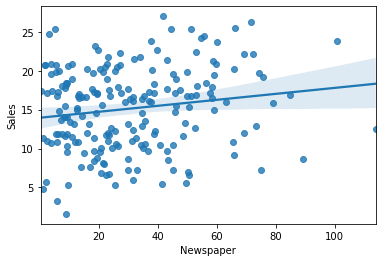

In [9]:
# visualise the data
sns.regplot(x='Newspaper', y='Sales', data=adv_df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

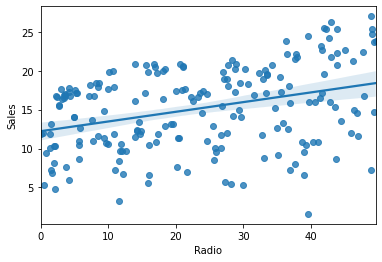

In [8]:
sns.regplot(x='Radio', y='Sales', data=adv_df)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

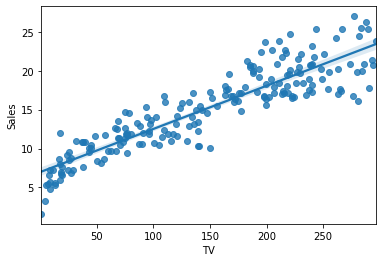

In [10]:
sns.regplot(x='TV', y='Sales', data=adv_df)

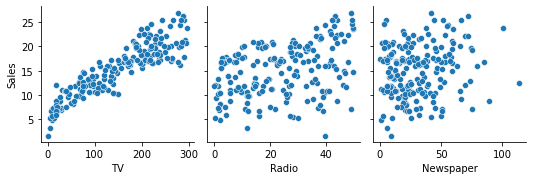

In [11]:
sns.pairplot(data=adv_df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

In [12]:
adv_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

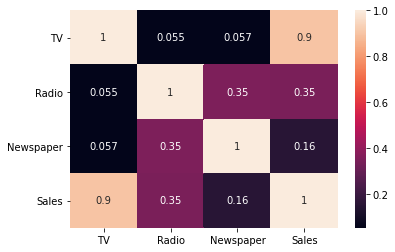

In [14]:
sns.heatmap(adv_df.corr(),annot=True)

Steps:
- 

In [18]:
#create X and Y
X = adv_df['TV']
y = adv_df['Sales']

In [20]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [23]:
#training the module
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
# y = c + m1. X1
# y = X.const + m1.TV

In [25]:
#fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
#Sales = 6.94 + 0.05.TV

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        20:00:26   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

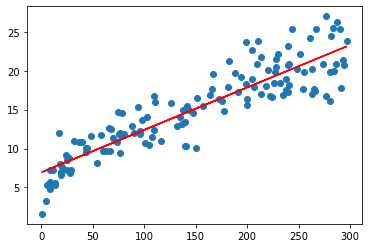

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr_model.params.const + lr_model.params.TV * X_train, 'r')
# plt.plot(X_train, round(lr_model.params.const,2) + round(lr_model.params. * X_train, 'r')
plt.show()

In [35]:
y_train_pred = lr_model.predict(X_train_sm)

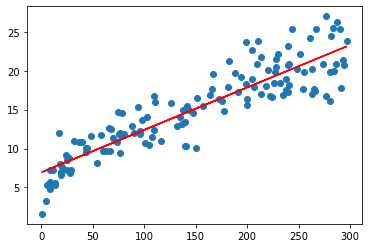

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
# plt.plot(X_train, round(lr_model.params.const,2) + round(lr_model.params. * X_train, 'r')
plt.show()

In [30]:
lr_model.params.const

6.9486832000013585

In [37]:
res = y_train - y_train_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

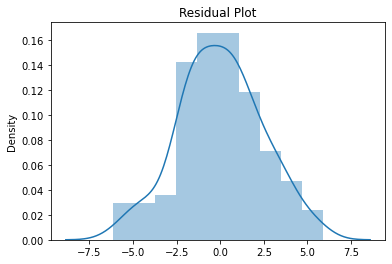

In [38]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

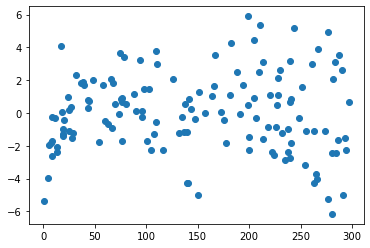

In [39]:
# look for patters in residuals()
plt.scatter(X_train, res)
plt.show()

## Step 4: Prediction and Evaluation on the Test Set

In [40]:
# add a cont/intercept to test
X_test = sm.add_constant(X_test)

In [41]:
#pred on test
y_test_pred = lr_model.predict(X_test)

In [43]:
#evaluate the model, r-squered, on the test
#r-squard
r2 = r2_score(y_true = y_test, y_pred =y_test_pred)
r2

0.7921031601245658

In [44]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [45]:
 mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

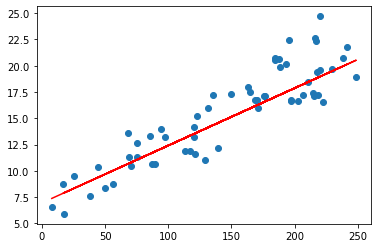

In [47]:
plt.scatter(X_test.TV, y_test)
plt.plot(X_test.TV, y_test_pred, 'r')
# plt.plot(X_train, round(lr_model.params.const,2) + round(lr_model.params. * X_train, 'r')
plt.show()

</n>

</n>
</n>
</n>
</n>
</n>







# Linear Regression Using sklearn

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [66]:
# reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

## Steps in sklearn model building

### 1. Create an object of linear regression

### 2. fit the model

### 3. see the params, make prediction (train, test)

### 4. evaluate(r2, etc)

In [67]:
lm = LinearRegression()
lm.fit(X_train_lm, y_train)

LinearRegression()

In [68]:
lm.coef_, lm.intercept_

(array([0.05454575]), 6.948683200001357)

In [72]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [75]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
# r2_score(y_true=y_test, y_pred=y_test_pred)

0.8157933136480389


In [74]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7921031601245662